In [2]:
!pip install numpy
!pip install pandas

import numpy as np
import pandas as pd

     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.9 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 649.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
   ---------------------------------------- 0.2/16.5 MB 3.5 MB/s eta 0:00:05
   - -------------------------------------- 0.5/16.5 MB 4.9 MB/s eta 0:00:04
   - -------------------------------------- 0.8/16.5 MB 5.6 MB/s eta 0:00:03
   -- ------------------------------------- 1.1/16.5 MB 5.8 MB/s eta 0:00:03
   --- ------------------------------------ 1.5/16.5 MB 6.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.7/16.5 MB 5.9 MB/s eta 0:00:03
   ---- ----------------------------------- 1.9/16.5 MB 6.0 MB/s eta 0:00:03
   ---- ----------------------------------- 2.0/16.5 MB 5.7 MB/s eta 0:00:03
   ----- ---------------------------------- 2.3/16.5 MB 5.9 MB/s eta 0:00:03
   --

In [7]:
!pip install chardet
import chardet

with open('spam.CSV', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']

# Read the CSV file with the detected encoding
df = pd.read_csv('spam.CSV', encoding=encoding)

In [8]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1504,ham,Oh my God. I'm almost home,NaN,NaN,NaN
4378,ham,How are you. Just checking up on you,NaN,NaN,NaN
2877,spam,Hey Boys. Want hot XXX pics sent direct 2 ur p...,NaN,NaN,NaN
928,ham,Oh all have to come ah?,NaN,NaN,NaN
5508,ham,"Machan you go to gym tomorrow, i wil come lat...",NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

## Data cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.sample(5)

,v1,v2
3949,ham,I got to video tape pple type in message lor. ...
5465,ham,Shall I bring us a bottle of wine to keep us a...
3281,ham,Hey you around? I've got enough for a half + t...
931,ham,Congratulations ore mo owo re wa. Enjoy it and...
5402,ham,Hi babe its me thanks for coming even though i...


In [13]:
# rename columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [14]:
df.sample(5)

,target,text
2220,ham,But really quite funny lor wat... Then u shd h...
2850,ham,Are you going to wipro interview today?
672,spam,Get ur 1st RINGTONE FREE NOW! Reply to this ms...
4216,ham,Will be office around 4 pm. Now i am going hos...
4173,ham,And pls pls drink plenty plenty water


In [17]:
!pip install scikit-learn

#label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     -------------------------------------- 60.6/60.6 kB 811.9 kB/s eta 0:00:00
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.0 MB 2.4 MB/s eta 0:00:05
   - -------------------------------------- 0.3/11.0 MB 2.1 MB/s eta 0:00:06
   - -------------------------------------- 0.4/11.0 MB 1.9 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/11.0 MB 2.7 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/11.0 MB 2.9 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.0 MB 3.0 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/11.0 MB 3.0 MB/s eta 0:00:04
   ---- ------------

In [18]:
df['target'] = encoder.fit_transform(df['target'])

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [21]:
# duplicate check
df.duplicated().sum()

np.int64(403)

In [22]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.shape

(5169, 2)

## EDA

In [25]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -------------- ------------------------ 61.4/165.5 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.2/8.0 MB 12.3 MB/s eta 0:00:01
   - -------------------------------------- 0.3/8.0 MB 4.5 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/8.0 MB 4.7 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/8.0 MB 4.7 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/8.0 MB 4.7 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/8.0 MB 4.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/8.0 MB 4.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.0 MB 4.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/8.0 MB 4.2 MB/s eta 0:00:02
   -------- -

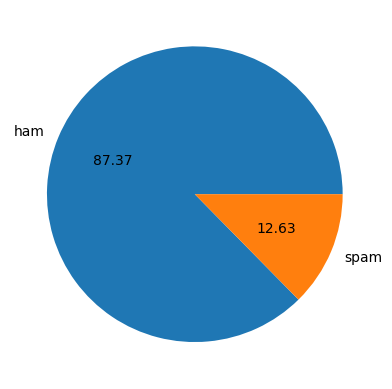

In [28]:
!pip install matplotlib

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [31]:
!pip install nltk
import nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 682.7 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 689.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB ? eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.5 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.5 MB 4.7 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.5 MB 5.6 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.5 MB 5.1 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.5 MB 5.0 MB/s eta 0:00:01
   ------------------------------- -------- 1.2/1.5 MB 5.0 MB/s eta 0:00:01
   ------------------------------------- -- 1.4/1.5 MB 5.2 MB/s eta 0:00:01
   --------------------------

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
df['num_chars']=df['text'].apply(len)

In [34]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [36]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [37]:
#num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [38]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [39]:
df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
#ham messages
df[df['target']==0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
#spam messages
df[df['target']==1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [43]:
!pip install seaborn
import seaborn as sns

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 653.6 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/294.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00


<Axes: xlabel='num_chars', ylabel='Count'>

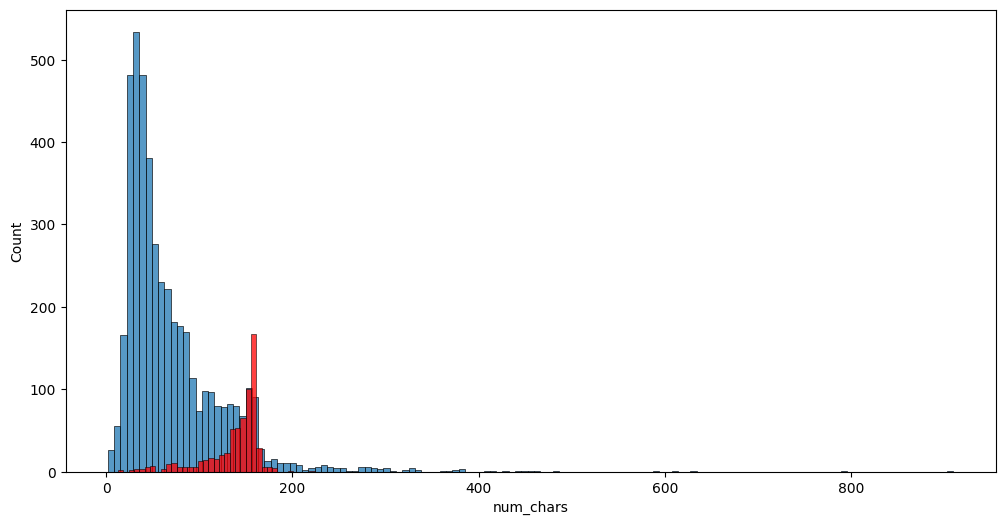

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_chars']) 
sns.histplot(df[df['target']==1]['num_chars'],color='red') 

<Axes: xlabel='num_words', ylabel='Count'>

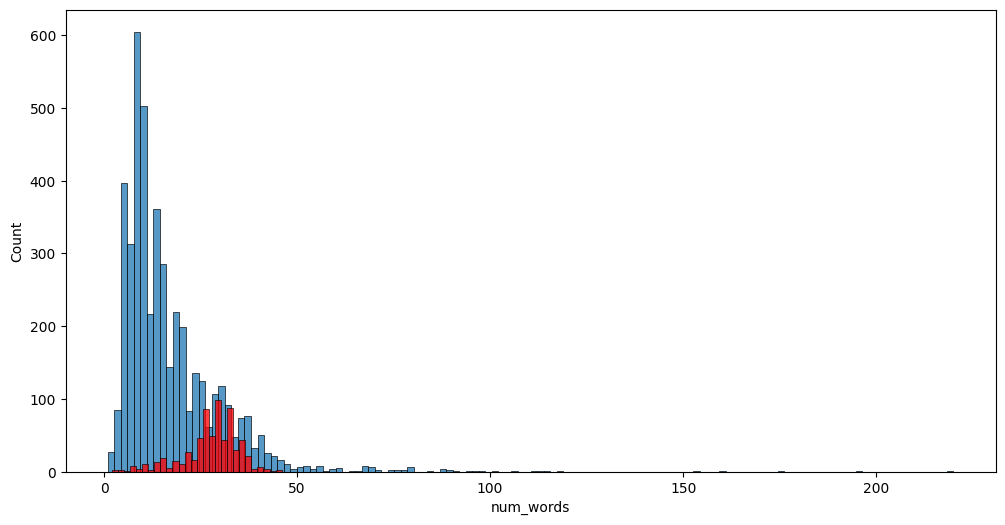

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words']) 
sns.histplot(df[df['target']==1]['num_words'],color='red') 

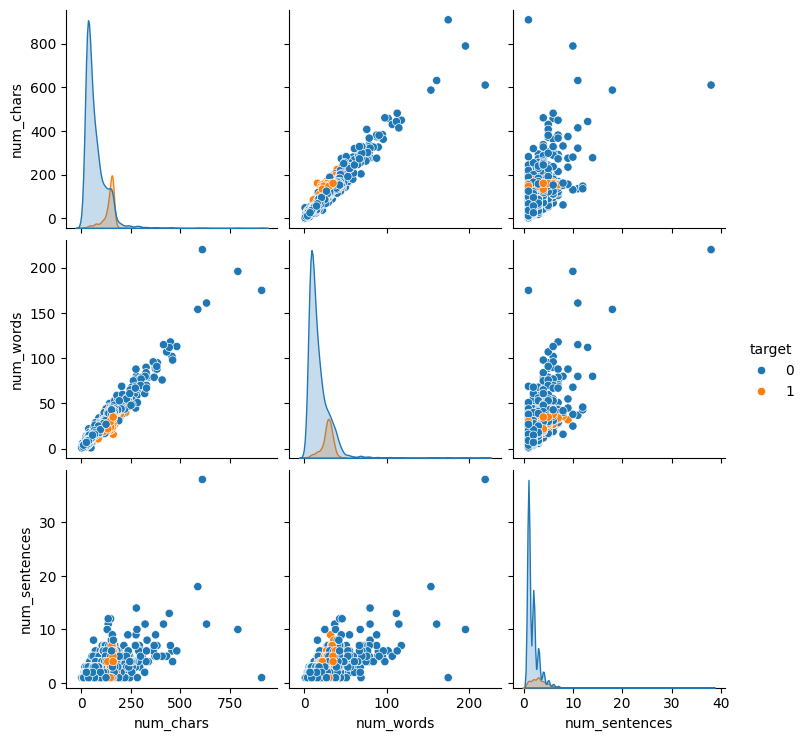

In [46]:
sns.pairplot(df,hue='target')

In [48]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
numeric_df.corr()

,target,num_chars,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

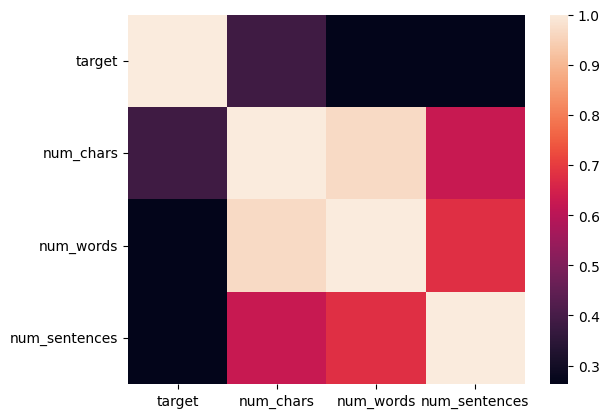

In [49]:
sns.heatmap(numeric_df.corr()) 

## Data preprocessing

In [50]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
df['transformed_text']=df['text'].apply(transform_text)

In [52]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
!pip install wordcloud

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

  Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl (300 kB)


In [54]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

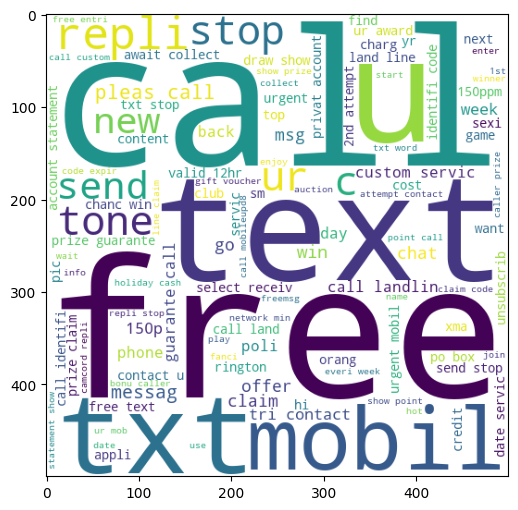

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

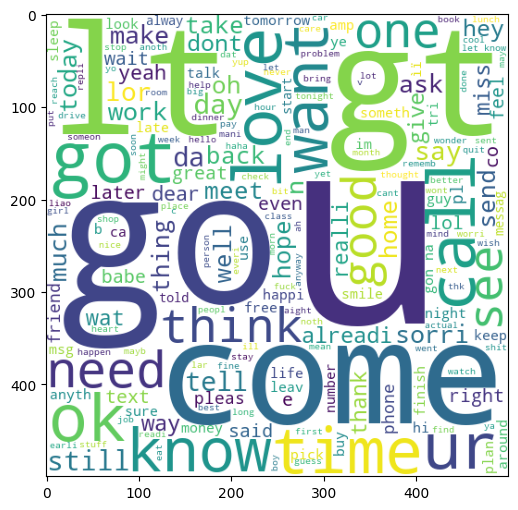

In [56]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [58]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [59]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [60]:
len(spam_corpus)

9939

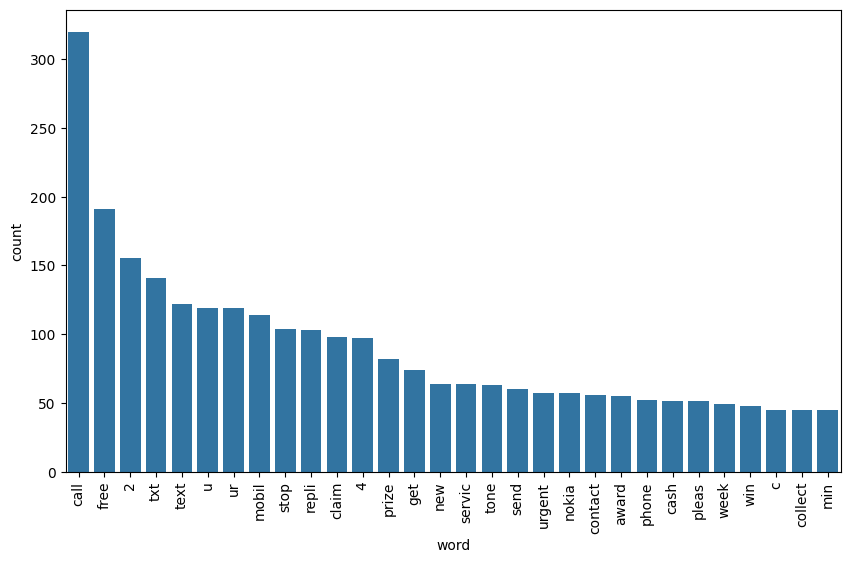

In [61]:
from collections import Counter 
df1=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['word', 'count'])
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df1)
plt.xticks(rotation=90)
plt.show()

In [62]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35404

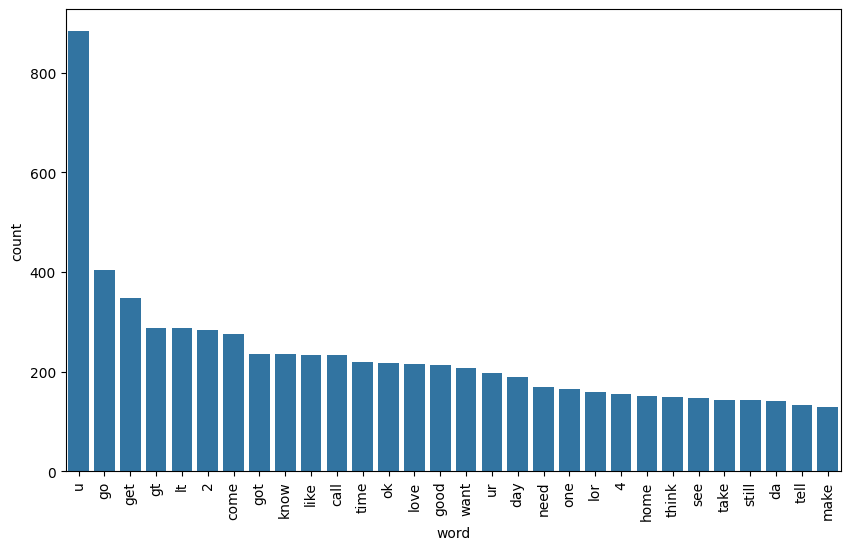

In [63]:
from collections import Counter 
df1=pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['word', 'count'])
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df1)
plt.xticks(rotation=90)
plt.show()

## Model Building

In [64]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [65]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [66]:
X.shape

(5169, 3000)

In [67]:
y = df['target'].values

In [68]:
y


array([0, 0, 1, ..., 0, 0, 0])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
gnb.fit(X_train,y_train)
y_pred1 =  gnb.predict(X_test) 

In [74]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [75]:
mnb.fit(X_train,y_train)
y_pred2 =  mnb.predict(X_test) 
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [76]:
bnb.fit(X_train,y_train)
y_pred3 =  bnb.predict(X_test) 
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [77]:
# worked nice => tfidf with mnb 

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [79]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [80]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
}

In [81]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [82]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739


In [83]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [84]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
4,LR,0.955513,0.960000
3,DT,0.932302,0.833333


In [85]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,LR,Accuracy,0.955513
5,DT,Accuracy,0.932302
6,KN,Precision,1.000000
7,NB,Precision,1.000000
8,RF,Precision,0.982609
9,SVC,Precision,0.974790


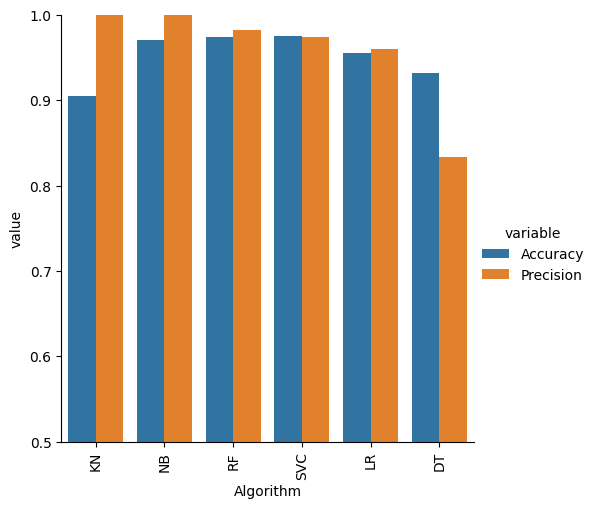

In [86]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [87]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))